In [4]:
import matplotlib.pyplot as plt
from skimage.exposure import rescale_intensity
from skimage import io, filters, color, measure
from skimage.feature import peak_local_max
from scipy import ndimage 
import numpy as np
import xlrd
import freud.box
from freud import box, density
from scipy import stats
import os
%matplotlib inline
    
def get_dots2(file,microns=2,compare=False,size=2,spacing=5):
    '''
        Get a docstring started.
    '''
    # put in a single line comment
    image = color.rgb2gray(io.imread(file))
    i1 = filters.gaussian(image,sigma=.7)
    i1 = ndimage.maximum_filter(i1,size=size,mode='constant')
    coordinates = peak_local_max(i1, min_distance=spacing,indices=False)
    if compare:
        io.imshow(image -coordinates)
    label_img = measure.label(coordinates)
    centroids = []
    for region in measure.regionprops(label_img):
        centroids.append(region.centroid)
    scaled = microns*np.asarray(centroids)/image.shape - [microns/2,microns/2]
    return np.append(scaled,np.zeros((len(scaled),1)),axis=1)

def plot_rdf(dots,L,plot=True):
    '''
        Parameters: dots : ndarray
                        List of qd centers (x and y coordinates)
                    L : float
                        Lenght of the image from which the dots were found, in microns
    '''
    box = freud.box.Box(L,L,is2D=True)
    box.periodic=[True,True,False]
    rdf = freud.density.RDF(20,.49,normalize=True)
    rdf.compute(system=(box,dots),reset=True)
    if plot:
        plt.scatter(rdf.bin_centers, rdf.rdf)
        plt.xlabel("r (μm)")
        plt.ylabel("<g(r)>")
        plt.show()
    return rdf.bin_centers, rdf.rdf

In [5]:
help(plot_rdf)
rdfs = []


Help on function plot_rdf in module __main__:

plot_rdf(dots, L, plot=True)
    Parameters: dots : ndarray
                    List of qd centers (x and y coordinates)
                L : float
                    Lenght of the image from which the dots were found, in microns



<ipython-input-1-079723abf359>:15: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  image = color.rgb2gray(io.imread(file))


130.27726451049213


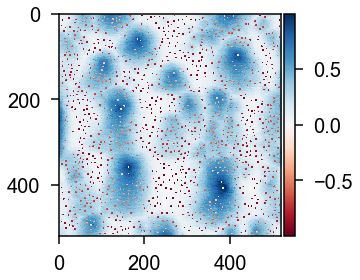

In [3]:
L=5
R=[]
dots=get_dots2("106/5a.tif",compare=True,microns=L,size=4, spacing=4)
b=1/np.sqrt(len(dots)/(L*1000*1000*L))
print(b)
R.append(b)

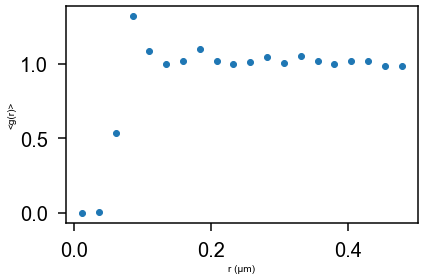

In [4]:
rdfs.append(plot_rdf(dots,L,plot=True)[1])


<ipython-input-1-079723abf359>:15: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  image = color.rgb2gray(io.imread(file))


99.01475429766744


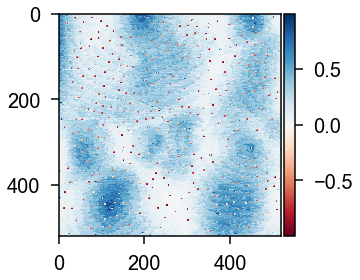

In [5]:
L=2
dots=get_dots2("106/2a.tif",compare=True, microns =L,size=4, spacing=10)
b=1/np.sqrt(len(dots)/(L*1000*1000*L))
print(b)
R.append(b)

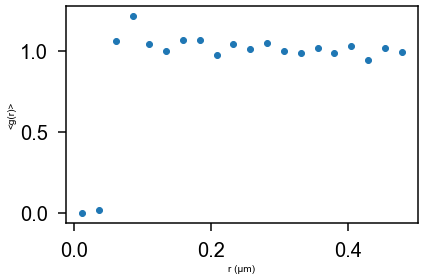

In [6]:
rdfs.append(plot_rdf(dots,L,plot=True)[1])


<ipython-input-1-079723abf359>:15: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  image = color.rgb2gray(io.imread(file))


100.75854437197567


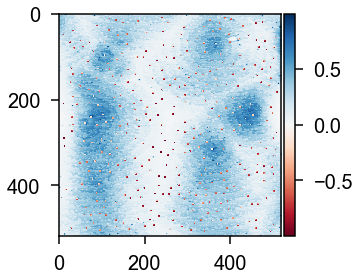

In [7]:
dots=get_dots2("106/2b.tif",compare=True, microns =L,size=4 ,spacing=10)
b=1/np.sqrt(len(dots)/(L*1000*1000*L))
print(b)
R.append(b)

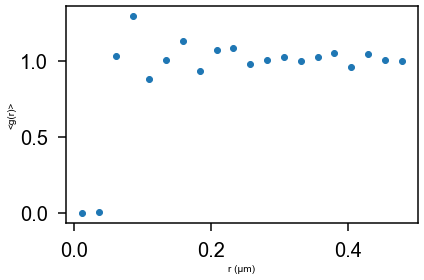

In [8]:
rdfs.append(plot_rdf(dots,L,plot=True)[1])


<ipython-input-1-079723abf359>:15: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  image = color.rgb2gray(io.imread(file))


97.24332766526304


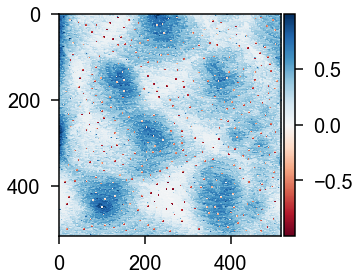

In [9]:
dots=get_dots2("106/2c.tif",compare=True, microns =L, size=4, spacing=10)
b=1/np.sqrt(len(dots)/(L*1000*1000*L))
print(b)
R.append(b)

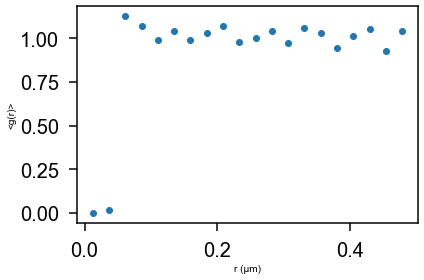

In [10]:
rdfs.append(plot_rdf(dots,L,plot=True)[1])


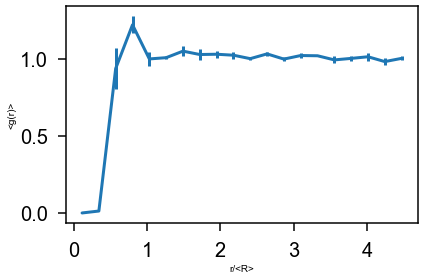

In [11]:
rdfs = np.asarray(rdfs)
mean_count = np.mean(rdfs,axis=0)
sem =  stats.sem(rdfs, axis=0, ddof=1)
r,rdf = plot_rdf(dots,L,plot=False)
plt.errorbar(1000*r/np.mean(R), mean_count, yerr=sem)
#plt.xlabel("r (μm)")
plt.xlabel("r/<R>")
plt.ylabel("<g(r)>")
plt.savefig("M106.png")
np.savetxt("M106.csv",(1000*r/np.mean(R),mean_count,sem),delimiter=',')
plt.show()

In [12]:
R

[130.27726451049213, 99.01475429766744, 100.75854437197567, 97.24332766526304]

In [13]:
print(np.mean(R),np.std(R))

106.82347271134958 13.597968303091294
